In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl 

In [2]:
import tensorflow as tf 
from tensorflow import keras 

# Loading the MNIST Dataset
label - Description

0 - T-shirt/top

1 - Trouser

2 - Pullover

3 - Dress

4 - Coat

5 - Sandal

6 - Shirt

7 - Sneaker

8 - Bag

9 - Ankle boot

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full),(X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

## Data reshape 

Before doing the reshaping the size of the X_train, X_test was seen to be (60,000,28,28) and (10,000, 28,28) but we need to add another dimension for the color channel, in this case it is grayscale

In [6]:
X_train_full = X_train_full.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

In [7]:
X_test.shape

(10000, 28, 28, 1)

## Data normaliztion 

We make the data dimensions so that they are of approximately the same scale 

In [8]:
X_train_n = X_train_full / 255. 
X_test_n = X_test / 255. 

## Split the data into train/validation datasets 

Validation dataset - used for tuning the hyperparameters and evaluate the models 

In [9]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

In [10]:
np.random.seed(42)
tf.random.set_seed(42)

## Architecture 

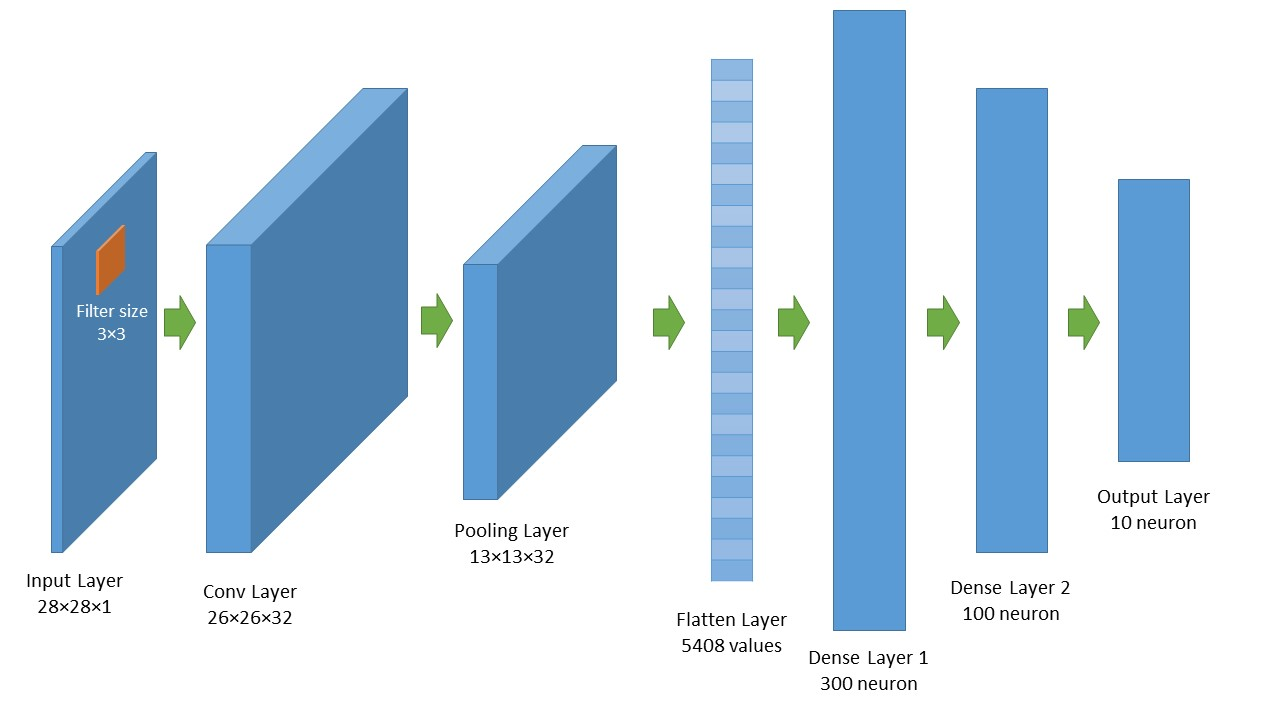

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=1, padding='valid', activation ='relu',input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 300)               1622700   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
______________________________________________

In [13]:
model.compile(loss='sparse_categorical_crossentropy', 
             optimizer="sgd",
             metrics = ['accuracy'])

In [14]:
callback_cb = keras.callbacks.ModelCheckpoint("early_stop_model.h5",save_best_only=True)

In [15]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights= True)

In [16]:
model_history = model.fit(X_train, y_train, epochs=100, batch_size=64,
                         validation_data=(X_valid, y_valid), callbacks=[callback_cb, early_stopping_cb])

Epoch 1/100
860/860 [==============================] - 3s 2ms/step - loss: 0.8766 - accuracy: 0.6989 - val_loss: 0.7500 - val_accuracy: 0.7350
Epoch 2/100
860/860 [==============================] - 1s 2ms/step - loss: 0.5388 - accuracy: 0.8049 - val_loss: 0.4915 - val_accuracy: 0.8198
Epoch 3/100
860/860 [==============================] - 1s 2ms/step - loss: 0.4810 - accuracy: 0.8261 - val_loss: 0.9205 - val_accuracy: 0.7096
Epoch 4/100
860/860 [==============================] - 1s 2ms/step - loss: 0.4441 - accuracy: 0.8413 - val_loss: 0.4163 - val_accuracy: 0.8568
Epoch 5/100
860/860 [==============================] - 1s 2ms/step - loss: 0.4199 - accuracy: 0.8494 - val_loss: 0.4356 - val_accuracy: 0.8464
Epoch 6/100
860/860 [==============================] - 1s 2ms/step - loss: 0.3960 - accuracy: 0.8578 - val_loss: 0.3771 - val_accuracy: 0.8704
Epoch 7/100
860/860 [==============================] - 1s 2ms/step - loss: 0.3786 - accuracy: 0.8661 - val_loss: 0.4069 - val_accuracy: 0.8548

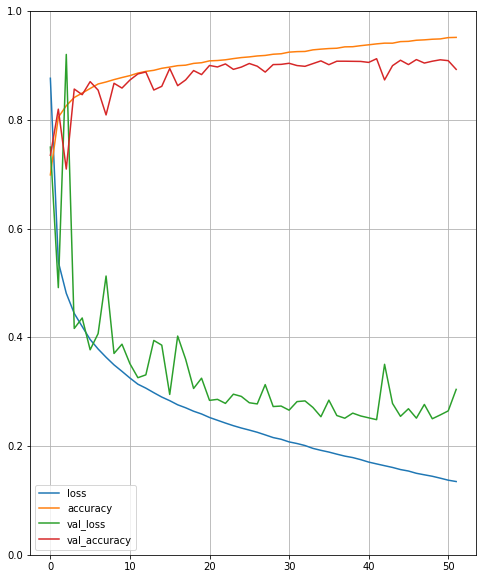

In [17]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize=(8,10))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [18]:
ev = model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2614 - accuracy: 0.9070


In [19]:
X_new = X_test[:3]

In [22]:
y_pred = model.predict(X_new)
y_pred = np.argmax(y_pred,axis=1)
y_pred

array([9, 2, 1])

In [23]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

AxesImage(54,36;334.8x217.44)


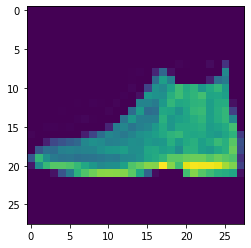

In [24]:
print(plt.imshow(X_test[0].reshape(28,28)))

In [26]:
keras.backend.clear_session()

In [38]:
del model

NameError: name 'model' is not defined

## Pooling vs No-Pooling 

In [41]:
model_a = keras.models.Sequential()
model_a.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=1, padding='valid', activation ='relu',input_shape=(28,28,1)))
model_a.add(keras.layers.MaxPool2D((2,2)))
model_a.add(keras.layers.Flatten())
model_a.add(keras.layers.Dense(300, activation='relu'))
model_a.add(keras.layers.Dense(100, activation='relu'))
model_a.add(keras.layers.Dense(10, activation='softmax'))

model_b = keras.models.Sequential()
model_b.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=1, padding='valid', activation ='relu',input_shape=(28,28,1)))
model_b.add(keras.layers.Flatten())
model_b.add(keras.layers.Dense(300, activation='relu'))
model_b.add(keras.layers.Dense(100, activation='relu'))
model_b.add(keras.layers.Dense(10, activation='softmax'))

In [42]:
model_a.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 300)               1622700   
_________________________________________________________________
dense_10 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
____________________________________________

In [43]:
model_b.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
flatten_4 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 300)               6489900   
_________________________________________________________________
dense_13 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1010      
Total params: 6,521,330
Trainable params: 6,521,330
Non-trainable params: 0
_________________________________________________________________


In [44]:
model_a.compile(loss='sparse_categorical_crossentropy', 
             optimizer="sgd",
             metrics = ['accuracy'])

model_b.compile(loss='sparse_categorical_crossentropy', 
             optimizer="sgd",
             metrics = ['accuracy'])

In [45]:
model_a_history = model_a.fit(X_train, y_train, epochs=3, batch_size=64,
                         validation_data=(X_valid, y_valid))

Epoch 1/3
860/860 [==============================] - 2s 2ms/step - loss: 0.8841 - accuracy: 0.7019 - val_loss: 0.7843 - val_accuracy: 0.7206
Epoch 2/3
860/860 [==============================] - 1s 2ms/step - loss: 0.5318 - accuracy: 0.8069 - val_loss: 0.4978 - val_accuracy: 0.8128
Epoch 3/3
860/860 [==============================] - 2s 2ms/step - loss: 0.4793 - accuracy: 0.8272 - val_loss: 0.9376 - val_accuracy: 0.6970


In [46]:
model_b_history = model_b.fit(X_train, y_train, epochs=3, batch_size=64,
                         validation_data=(X_valid, y_valid))

Epoch 1/3
860/860 [==============================] - 2s 2ms/step - loss: 0.7245 - accuracy: 0.7547 - val_loss: 0.6797 - val_accuracy: 0.7544
Epoch 2/3
860/860 [==============================] - 2s 2ms/step - loss: 0.4852 - accuracy: 0.8244 - val_loss: 0.4755 - val_accuracy: 0.8168
Epoch 3/3
860/860 [==============================] - 2s 2ms/step - loss: 0.4367 - accuracy: 0.8409 - val_loss: 0.9703 - val_accuracy: 0.6994
